# dataset_generator

In [3]:
class dataset_generator:
  def __init__(self, feature_dim = 1, n_sample = 100, noise = 0):
    self._feature_dim = feature_dim
    self._n_sample = n_sample
    self._noise = noise

    self._coefficient = None
    self._init_set_coefficient()

  def _init_set_coefficient(self):
    self._coefficient = [1 for _ in range(self._feature_dim)] + [0]  # weights + bias

  def set_n_sample(self, n_sample):
    self._n_sample = n_sample 

  def set_noise(self, noise):
    self._noise = _noise

  def set_coefficient(self, coefficient_list):
     self._coefficient = coefficient_list

  def make_dataset(self):
    x_data = np.random.normal(0, 1, size = (self._n_sample,
                                            self._feature_dim))
    y_data = np.zeros(shape = (self._n_sample, 1))
    for feature_idx in range(self._feature_dim):
      y_data += self._coefficient[feature_idx] * x_data[:,feature_idx].reshape(-1,1)
    y_data += self._coefficient[-1] # bias
    y_data += self._noise*np.random.normal(0,1,size=(self._n_sample, 1))

    return x_data, y_data

  def dataset_visualizer(self):
    if self._feature_dim == 1:
      plt.style.use('seaborn')

      fig, ax = plt.subplots(figsize=(10,10))
      ax.plot(x_data, y_data, 'bo',
              alpha=0.3,
              markersize=20)
      ax.tick_params(axis='both',
                     labelsize=30)
      ax.set_title("Dataset", fontsize=40, color='darkred')
      ax.set_xlabel('X data', fontsize=30, alpha=0.6)
      ax.set_ylabel('Y data', fontsize=30, alpha=0.6)

    else:
      class feature_dim_error(Exception):
        pass
      raise feature_dim_error("Visualization is valid for only feature_dim == 1")

# basic_nodes

In [24]:
class plus_node:
  def __init__(self):
    self._x, self._y = None, None
    self._z = None
  
  def forward(self,x,y):
    self._x, self._y = x, y
    self._z = self._x + self._y
    return self._z
  
  def backward(self, dz):
    return 1*dz, 1*dz

In [21]:
class minus_node:
  def __init__(self):
    self._x, self._y = None, None
    self._z = None

  def forward(self, x, y):
    self._x, self._y = x, y
    self._z = self._x - self._y
    return self._z

  def backward(self, dz):
    return 1*dz, -1*dz

In [22]:
class mul_node:
  def __init__(self):
    self._x, self._y = None, None
    self._z = None

  def forward(self, x, y):
    self._x , self._y = x, y
    self._z = self._x * self._y
    return self._z

  def backward(self, dz):
    return dz*self._y, dz*self._x

In [25]:
class square_node:
  def __init__(self):
    self._x = None
    self._z = None

  def forward(self, x):
    self._x = x
    self._z = self._x * self._x
    return self._z

  def backward(self, dz):
    return dz*2*self._x

In [26]:
class mean_node:
  def __init__(self):
    self._x = None
    self._z = None

  def forward(self, x):
    self._x = x
    self._z = np.mean(self._x)
    return self._z

  def backward(self, dz):
    dx = dz*1/len(self._x)*np.ones_like(self._x)
    return dx

# Dataset Preparation

In [27]:
# import required modules
import matplotlib.pyplot as plt
import numpy as np

# dataset preparation
dataset_gen = dataset_generator()
dataset_gen.set_coefficient([5,0])  # y=5x

x_data, y_data = dataset_gen.make_dataset()

# Model and Loss Function

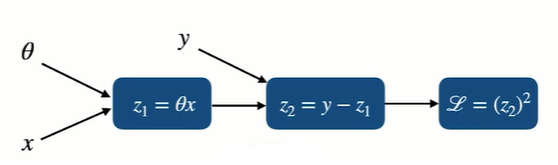

In [28]:
# model implementation
node1 = mul_node()

# square error loss implementation
node2 = minus_node()
node3 = square_node()

# Hyperparameter Setting

In [29]:
# hyperparameter setting
epochs = 5 
lr = 0.01

th = -1  # arbitary θ
loss_list = []
th_list = []

# Learning Process

In [30]:
for epoch in range(epochs):
  for data_idx in range(len(x_data)):
    x, y = x_data[data_idx], y_data[data_idx]

    z1 = node1.forward(th, x)
    z2 = node2.forward(y, z1)
    l = node3.forward(z2)

    dz2 = node3.backward(1)  # 제일 뒷부분에서는 영향을 미치면 안되기때문에 1을 받음(Cost도 아니고 Loss이니까)
    dy, dz1 = node2.backward(dz2)
    dth, dx = node1.backward(dz1)

    th = th - lr*dth

    th_list.append(th)
    loss_list.append(l)

# Result Visualization

Text(0.5, 0, 'Iteration')

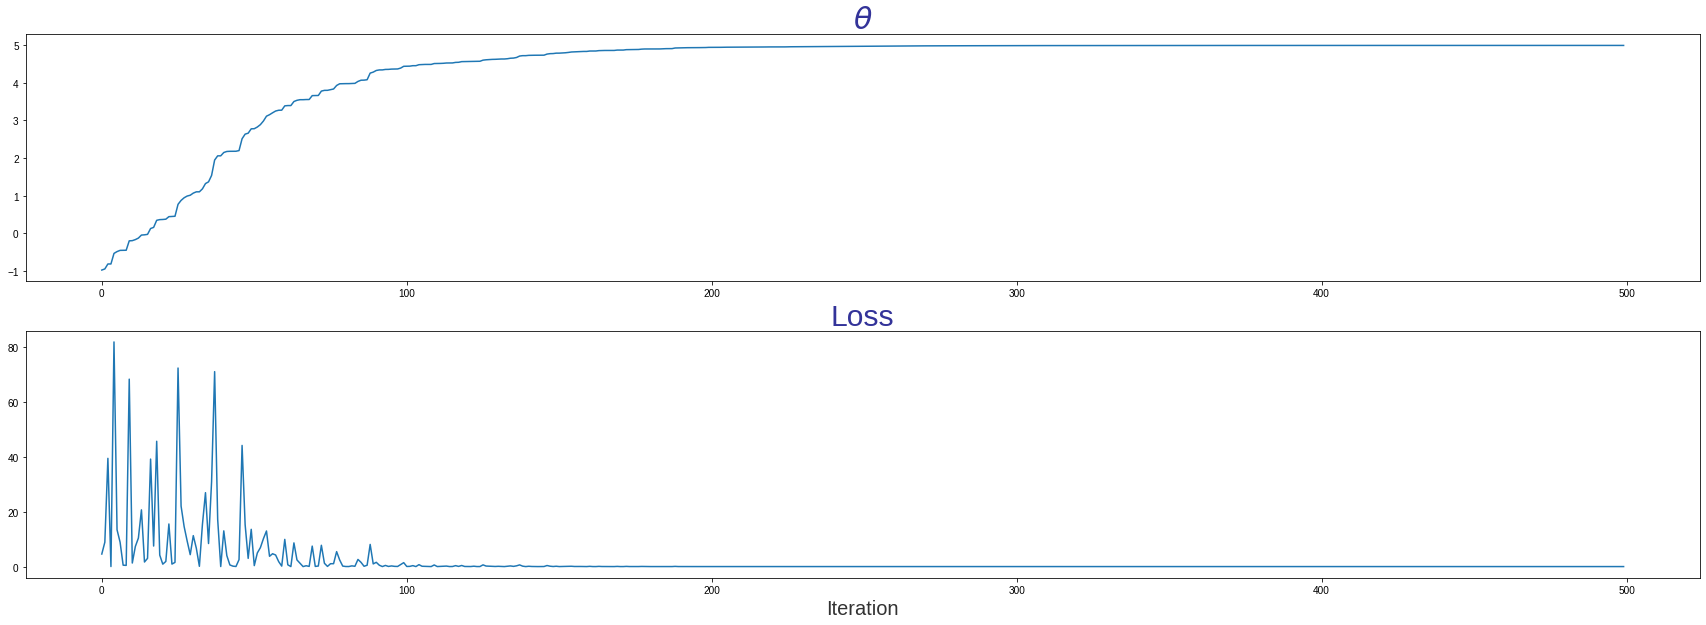

In [31]:
fig, ax = plt.subplots(2, 1, figsize=(30,10))
ax[0].plot(th_list)
ax[1].plot(loss_list)

title_font = {'size':30, 'alpha':0.8, 'color':'navy'}
label_font = {'size':20, 'alpha':0.8}
plt.style.use('seaborn')

ax[0].set_title(r'$\theta$', fontdict = title_font)
ax[1].set_title("Loss", fontdict = title_font)
ax[1].set_xlabel("Iteration", fontdict = label_font)

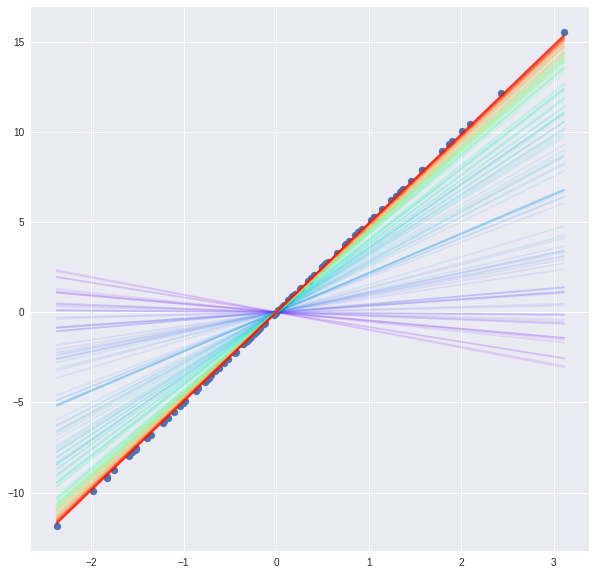

In [34]:
import matplotlib.cm as cm

N_line = 200
cmap = cm.get_cmap('rainbow', lut = N_line)

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.scatter(x_data, y_data)

test_th = th_list[:N_line]
x_range = np.array([np.min(x_data), np.max(x_data)])

for line_idx in range(N_line):
  pred_line = np.array([x_range[0]*test_th[line_idx],
                        x_range[1]*test_th[line_idx]])
  ax.plot(x_range, pred_line, color=cmap(line_idx), alpha = 0.1)